<a href="https://colab.research.google.com/github/AyushRanjan2023/CODSOFT/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
df.head(5).style.background_gradient(cmap='Reds')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [9]:
c=pd.DataFrame(df["Embarked"].unique())
c

,0
0,S
1,C
2,Q
3,NaN


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
def bar_chart(feature):
    survived=df[df["Survived"]==1][feature].value_counts()
    dead=df[df["Survived"]==0][feature].value_counts()
    d=pd.DataFrame([survived,dead])
    d.index=["Survived","Dead"]
    d.plot(kind="bar",stacked=True,figsize=(6,2.5))

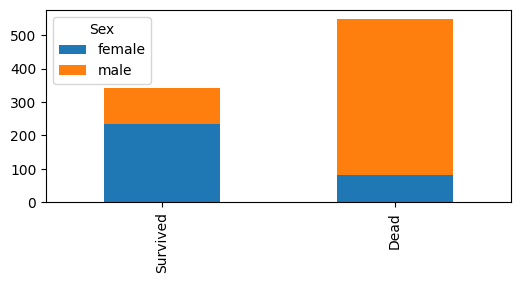

In [12]:
bar_chart("Sex")

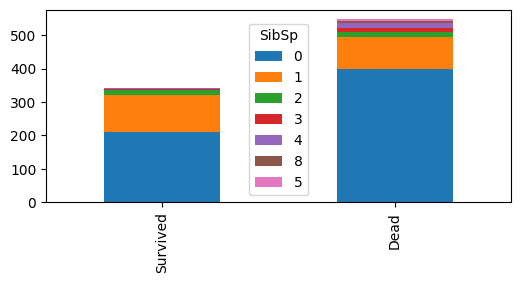

In [13]:
bar_chart("SibSp")

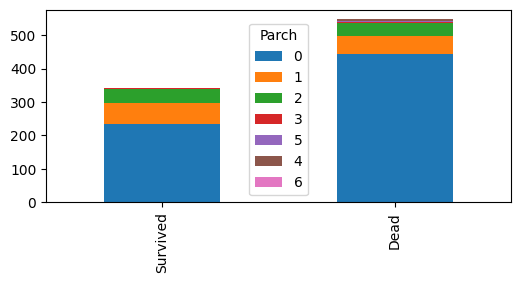

In [14]:
bar_chart("Parch")

Text(0, 0.5, 'Numbers')

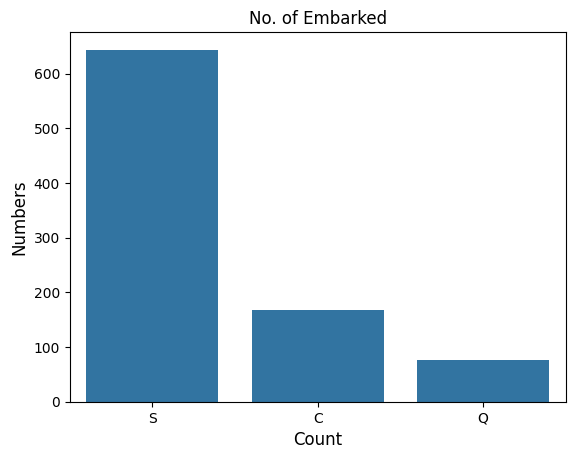

In [15]:
sns.countplot(x="Embarked",data=df)
plt.title("No. of Embarked")
plt.xlabel("Count",fontsize=12,c="k")
plt.ylabel("Numbers",fontsize=12,c="k")

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

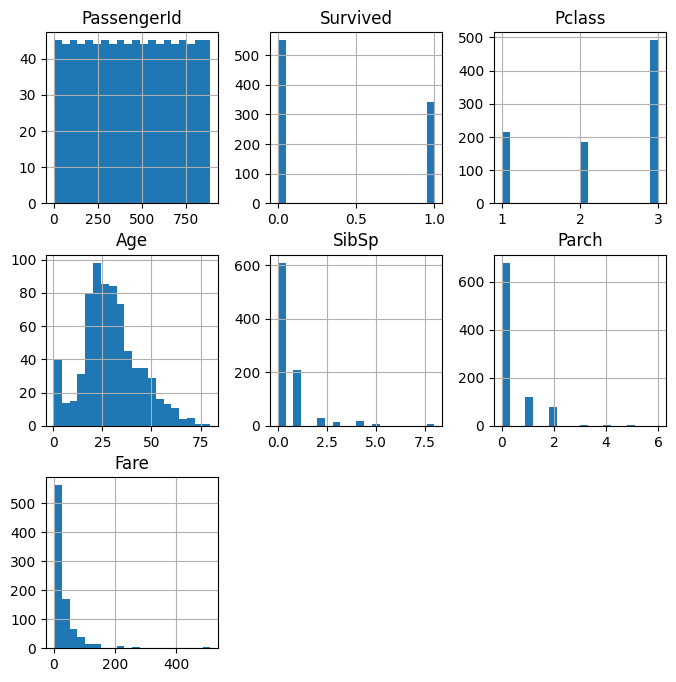

In [16]:
df.hist(bins=20,figsize=(8,8))

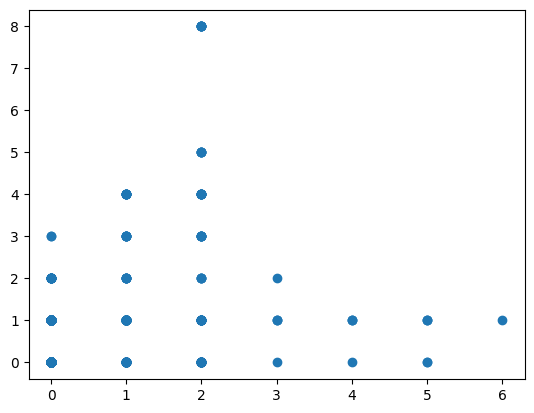

In [17]:
plt.scatter(df["Parch"],df["SibSp"])

<Axes: >

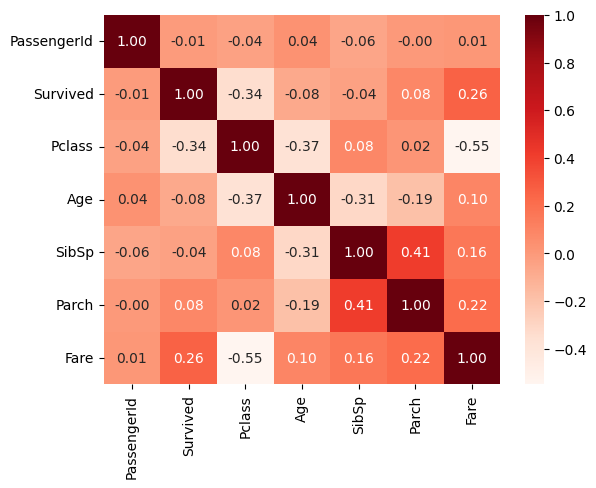

In [18]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="Reds")

<ipython-input-19-788a41249526>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"],color="r")


<Axes: xlabel='Fare', ylabel='Density'>

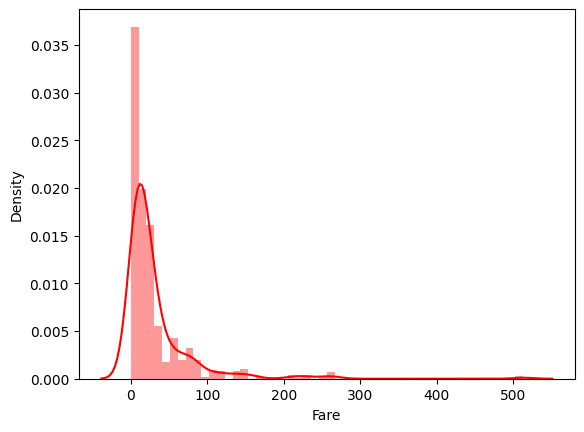

In [19]:
sns.distplot(df["Fare"],color="r")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


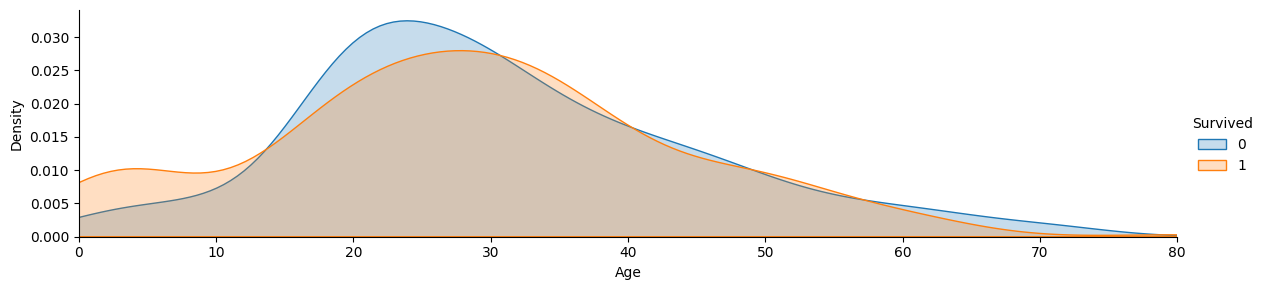

In [20]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


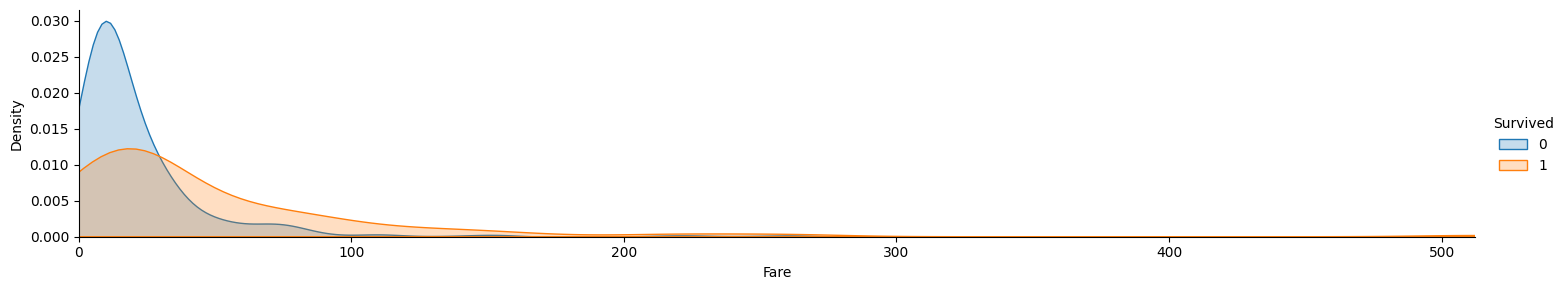

In [21]:
facet=sns.FacetGrid(df,hue="Survived",aspect=5)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,df["Fare"].max()))
facet.add_legend()
plt.show()


In [22]:
df_data=[df]
for dataset in df_data:
    dataset["title"]=dataset["Name"].str.extract("([A-Za-z]+)\.",expand=False)

In [23]:
df["title"].value_counts()

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [24]:
df=df.drop(["Name","Cabin","Ticket"],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Rev
887,888,1,1,female,19.0,0,0,30.0000,S,Miss
888,889,0,3,female,NaN,1,2,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,30.0000,C,Mr


In [25]:
Encoder=LabelEncoder()
df["Sex"]=Encoder.fit_transform(df["Sex"])
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [26]:
Encoder=LabelEncoder()
df["Embarked"]=Encoder.fit_transform(df["Embarked"])
df["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [33]:
numeric_df=df.select_dtypes(include=['number'])
imputer = SimpleImputer(strategy="median")
imputed_data=imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)
imputed_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0
887,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0
888,889.0,0.0,3.0,0.0,28.0,1.0,2.0,23.4500,2.0
889,890.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


In [34]:
x=imputed_df.drop(["Survived"],axis=1)
y=df["Survived"]
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,2.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,5.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,887.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0
887,888.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0
888,889.0,3.0,0.0,28.0,1.0,2.0,23.4500,2.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=True,random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (757, 8)
x_test shape (134, 8)
y_train shape (757,)
y_test shape (134,)


In [40]:
from sklearn.tree import DecisionTreeClassifier
clfc=DecisionTreeClassifier(random_state=0,max_depth=10,max_features=3)
clfc.fit(x_train,y_train)
clfc.score(x_train,y_train)

0.9326287978863936

In [41]:
y_predc=clfc.predict(x_test)
y_predc

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1])

In [42]:
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,y_predc)
b

0.7910447761194029